# Medical Cost Prediction

### Common Imports and Setups

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
np.random.seed(42)

## 1. Data Loading

In [3]:
med_cost = pd.read_csv('insurance.csv')
med_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
med_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
med_cost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 2. Data Exploration

### 2.1. Univariate and Bivariate Exploration

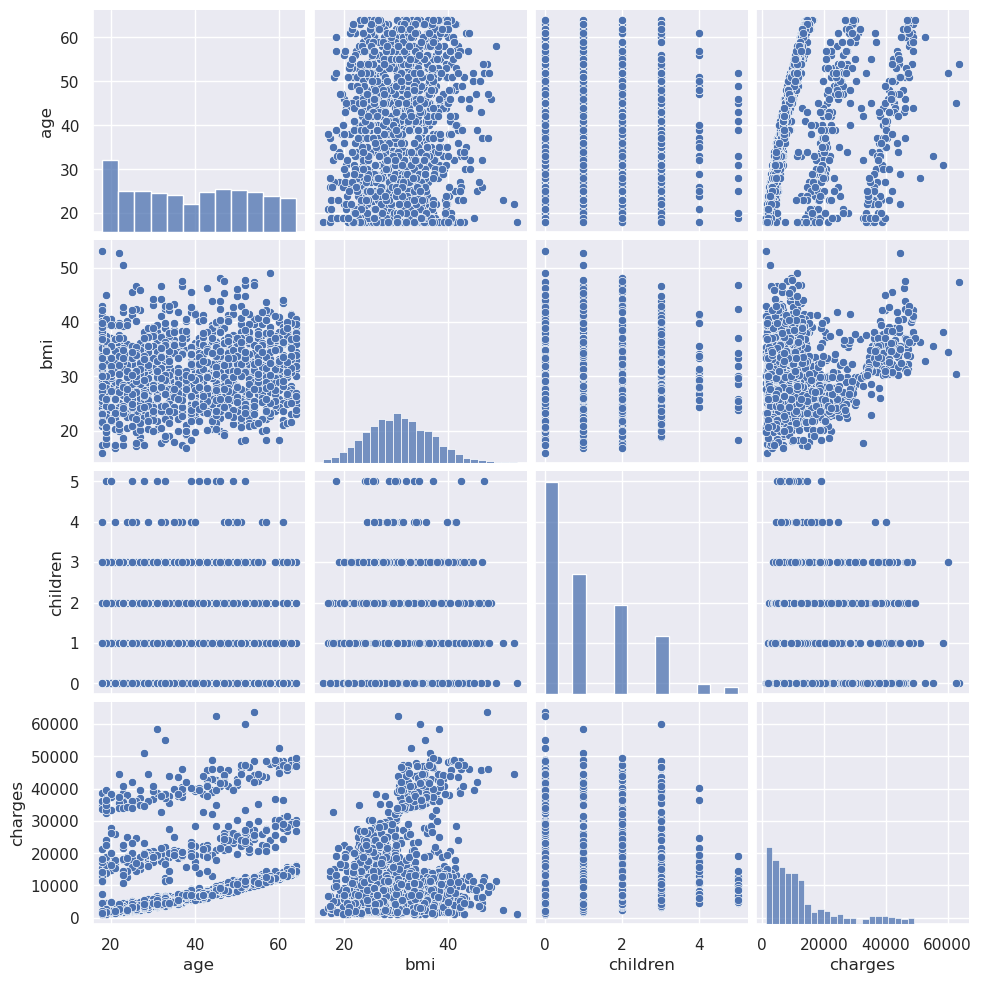

In [6]:
sns.pairplot(data=med_cost);

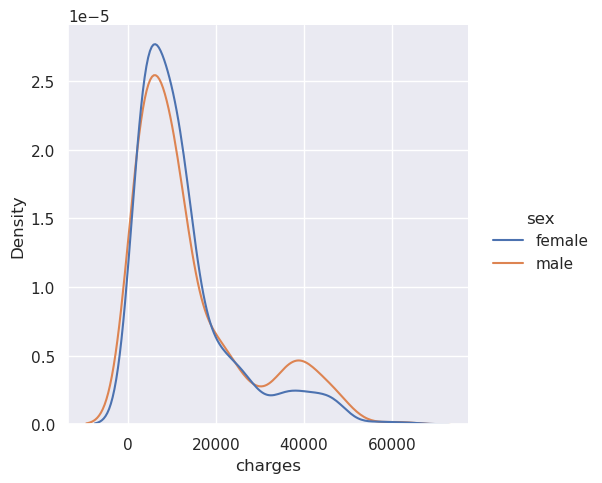

In [7]:
sns.displot(
    data=med_cost,
    x='charges',
    hue='sex',
    kind='kde'
);

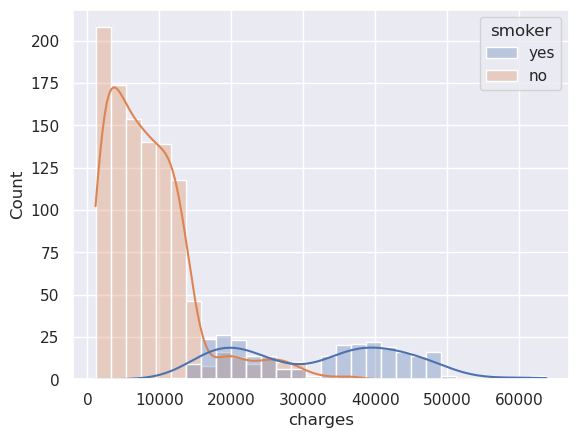

In [8]:
sns.histplot(data=med_cost, x='charges', hue='smoker', alpha=0.3, kde=True);

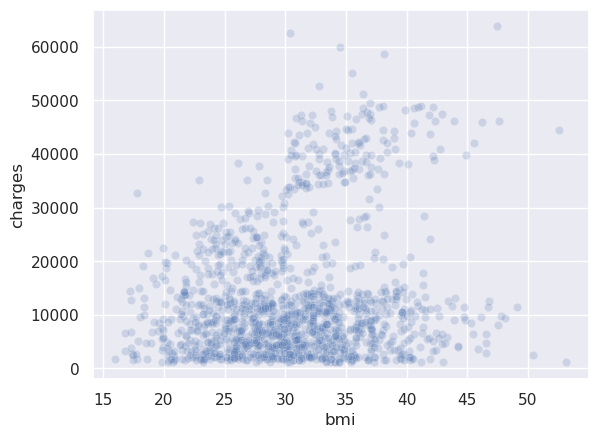

In [9]:
sns.scatterplot(data=med_cost, x='bmi', y='charges', alpha=0.2);

<AxesSubplot:ylabel='charges'>

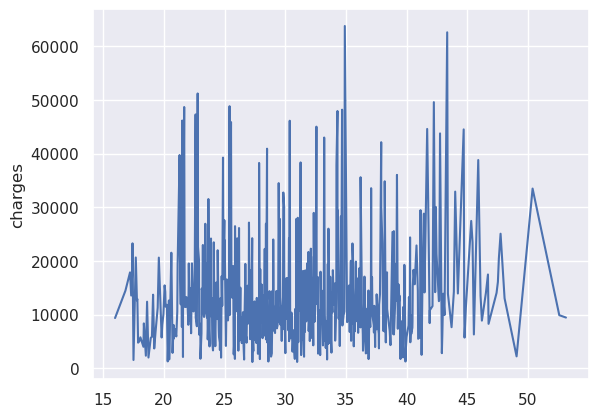

In [10]:
sns.lineplot(x=med_cost['bmi'].unique(), y=med_cost.groupby('bmi')['charges'].mean())

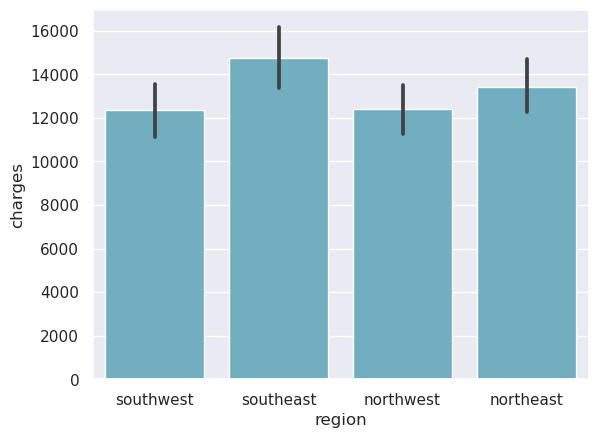

In [11]:
sns.barplot(data=med_cost, x='region', y='charges', color=sns.color_palette()[9]);

### 2.2. Multivariate Exploration

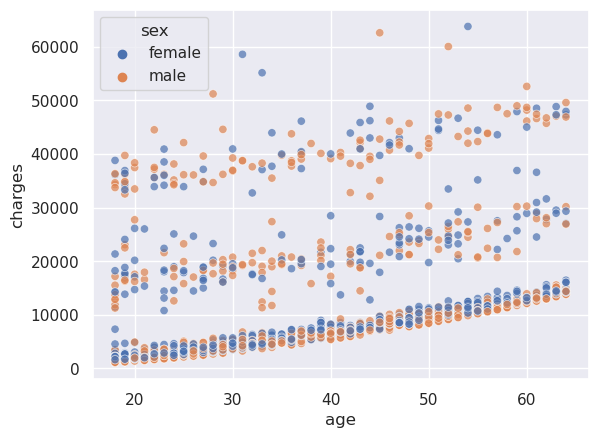

In [12]:
sns.scatterplot(data=med_cost, x='age', y='charges', hue='sex', alpha=0.7);

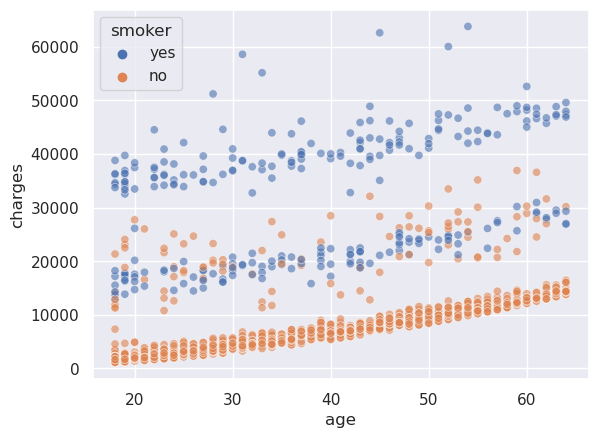

In [13]:
sns.scatterplot(data=med_cost, x='age', y='charges', hue='smoker', alpha=0.6);

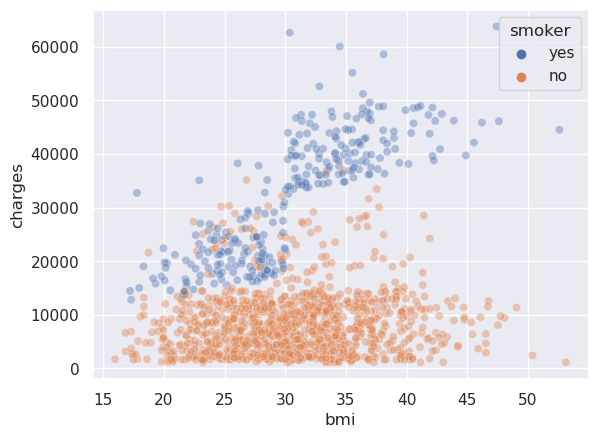

In [14]:
sns.scatterplot(data=med_cost, x='bmi', y='charges', hue='smoker', alpha=0.4);

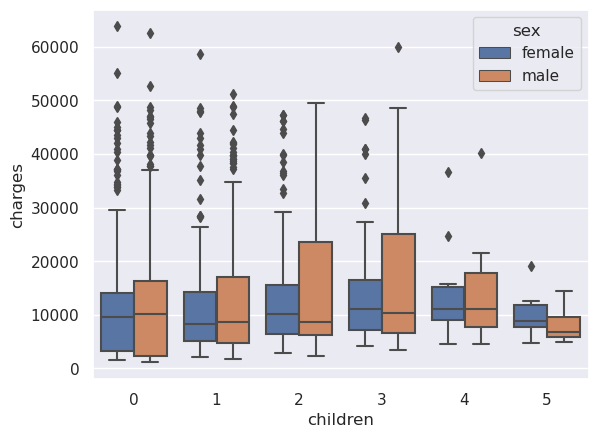

In [15]:
sns.boxplot(data=med_cost, x='children', y='charges', hue='sex');

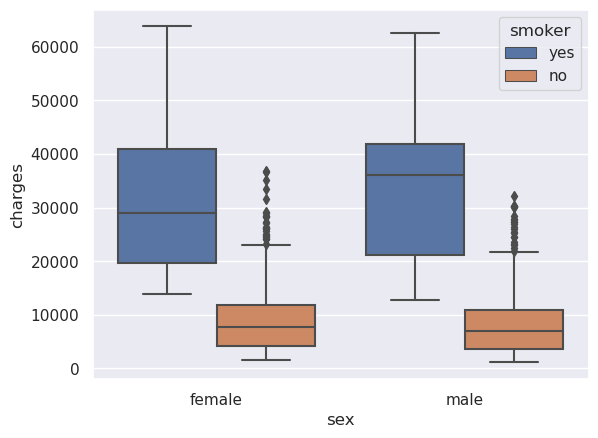

In [16]:
sns.boxplot(data=med_cost, x='sex', y='charges', hue='smoker');

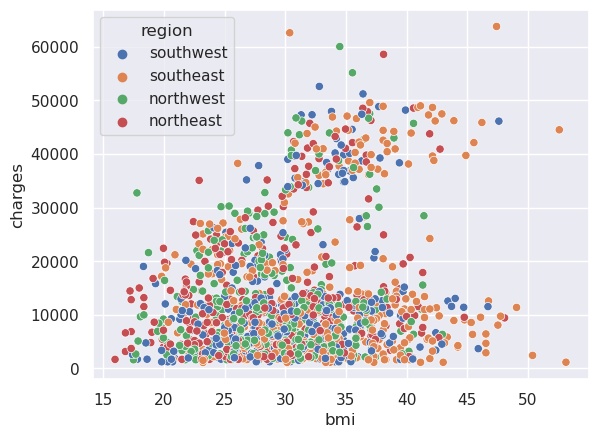

In [17]:
sns.scatterplot(data=med_cost, x='bmi', y='charges', hue='region');

## 3. Data Preprocessing

In [18]:
med_cost['smoker'].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [19]:
charges_raw = med_cost['charges']
features_raw = med_cost.drop('charges', axis=1)

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labEnc = LabelEncoder()
ohEnc = OneHotEncoder(sparse=False)

In [21]:
print('Before:', med_cost['smoker'].value_counts())
med_cost['smoker'] = labEnc.fit_transform(med_cost['smoker'])
print('After:', med_cost['smoker'].value_counts())

Before: no     1064
yes     274
Name: smoker, dtype: int64
After: 0    1064
1     274
Name: smoker, dtype: int64


In [22]:
print('Before:\n', med_cost['sex'].value_counts())
med_cost['sex'] = labEnc.fit_transform(med_cost['sex'])
print('After:\n', med_cost['sex'].value_counts())

Before:
 male      676
female    662
Name: sex, dtype: int64
After:
 1    676
0    662
Name: sex, dtype: int64


In [23]:
med_cost['region'].value_counts()
print('Before:\n', med_cost['region'].value_counts())
transformed_regions = pd.DataFrame(ohEnc.fit_transform(med_cost[['region']]))
med_cost = med_cost.join(transformed_regions)

Before:
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [30]:
med_cost.drop('region', axis=1, inplace=True)

In [31]:
med_cost.sample(15)

,age,sex,bmi,children,smoker,charges,0,1,2,3
468,28,0,24.320,1,0,23288.92840,1.0,0.0,0.0,0.0
430,19,1,33.100,0,0,23082.95533,0.0,0.0,0.0,1.0
409,32,1,30.030,1,0,4074.45370,0.0,0.0,1.0,0.0
1220,30,0,21.945,1,0,4718.20355,1.0,0.0,0.0,0.0
242,55,0,26.800,1,0,35160.13457,0.0,0.0,0.0,1.0
616,56,0,28.595,0,0,11658.11505,1.0,0.0,0.0,0.0
763,27,1,26.030,0,0,3070.80870,1.0,0.0,0.0,0.0
1305,24,0,27.720,0,0,2464.61880,0.0,0.0,1.0,0.0
197,45,0,28.600,2,0,8516.82900,0.0,0.0,1.0,0.0
488,44,0,38.060,0,1,48885.13561,0.0,0.0,1.0,0.0


In [32]:
med_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
 6   0         1338 non-null   float64
 7   1         1338 non-null   float64
 8   2         1338 non-null   float64
 9   3         1338 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.7 KB


In [33]:
med_cost.describe()

,age,sex,bmi,children,smoker,charges,0,1,2,3
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.272048,0.242900
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.445181,0.428995
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,1.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [36]:
features_preprocessed = med_cost.drop('charges', axis=1)
features_preprocessed.sample(10)

,age,sex,bmi,children,smoker,0,1,2,3
76,29,0,29.59,1,0,0.0,0.0,1.0,0.0
852,46,0,35.53,0,1,1.0,0.0,0.0,0.0
203,27,0,36.08,0,1,0.0,0.0,1.0,0.0
461,42,1,30.00,0,1,0.0,0.0,0.0,1.0
1254,34,0,27.72,0,0,0.0,0.0,1.0,0.0
417,36,0,22.60,2,1,0.0,0.0,0.0,1.0
687,40,1,41.69,0,0,0.0,0.0,1.0,0.0
1184,23,0,28.49,1,1,0.0,0.0,1.0,0.0
1127,35,0,35.86,2,0,0.0,0.0,1.0,0.0
132,53,0,35.90,2,0,0.0,0.0,0.0,1.0
